<center>
    <h1> Creating unstructured finite-element meshes</h1>
<div class="alert alert-success">
<h4>Geophysical Imaging and Montoring (GIM)<br> SoSe24</h4>
    
| Contact | Email   |
|----|---|
| Prof. Dr. Florian Wagner  | <fwagner@gim.rwth-aachen.de> |
</center>

In [3]:
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.meshtools as mt

In comparison to grids (as used in [1_pygimli_intro.ipynb](1_pygimli_intro.ipynb)), unstructured meshes allow to model more complex features such as topography, curved boundaries (clay lenses, lithological interfaces, etc.). They have the additional benefit that you can vary the cell size, i.e. you can refine in regions where you need high resolution (i.e., close to the sensors) and coarsen the mesh towards the boundaries.

To build a mesh of the subsurface, we first define the geometry. pyGIMLi holds a few useful functions for that:


- [`pygimli.meshtools.createWorld`](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html#pygimli.meshtools.createWorld)
- [`pygimli.meshtools.createRectangle`](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html#pygimli.meshtools.createRectangle)
- [`pygimli.meshtools.createCircle`](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html#pygimli.meshtools.createCircle)
- [`pygimli.meshtools.createLine`](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html#pygimli.meshtools.createLine)
- [`pygimli.meshtools.createPolygon`](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html#pygimli.meshtools.createPolygon) # arbitrary shapes based on a list of points

# Simple example

## Step 1: Creating a geometry

(<Axes: >, None)

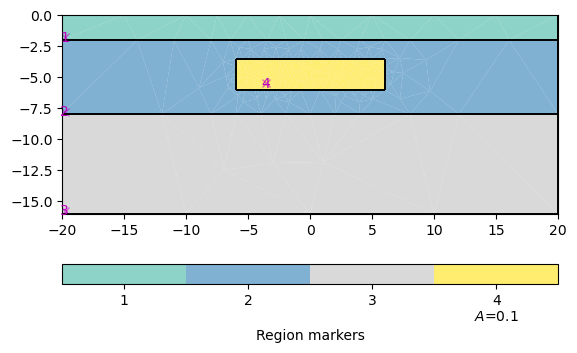

In [4]:
world = mt.createWorld(start=[-20, 0], end=[20, -16], layers=[-2, -8]) # layers at 2 and 8 meter depth

# Create a heterogeneous block
block = mt.createRectangle(start=[-6, -3.5], end=[6, -6.0],
                           marker=4,  boundaryMarker=10, area=0.1)

# Merge geometrical entities by adding them together
geom = world + block

# Visualize with the pg.show function
pg.show(geom)

Note that the region markers can be used in a later stage to assign subsurface properties (e.g., electrical conductivity).

## Step 2: Meshing the geometry

(<Axes: >, None)

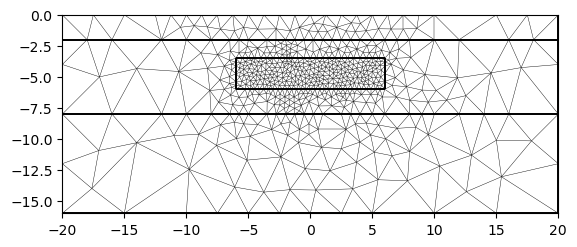

In [5]:
mesh = mt.createMesh(geom)
pg.show(mesh)

<div class="alert alert-success">
    
### Exercise: 
Use the functions above to create a realistic 2D mesh of a geological scenario. Start with the geometry in a first step and call the `createMesh` function on the created mesh afterwards. If you are happy, you can save your mesh with the `.save("mymesh.bms")` method for later reuse (e.g. to model electric fields or seismic raypaths).

</div>

Text(50.097222222222214, 0.5, 'Depth in m')

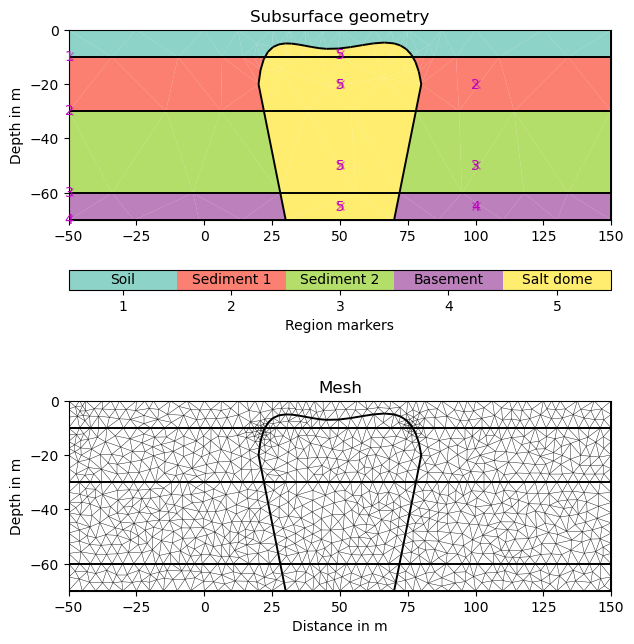

In [6]:
# Your geometry and mesh here

# Create layered subsurface
xmin = -50
xmax = 150
zmax = -70
world = mt.createWorld([xmin,zmax], [xmax, 0], layers=[-10,-30,-60])

# Create surface points for Diatreme
pnts = [[20,-20], [30,-5], [45,-7], [70,-5], [80,-20]]
top = mt.createPolygon(pnts, addNodes=5, interpolate="spline")
left = mt.createLine([30,-70], pnts[0])
right = mt.createLine([70,-70], pnts[-1])

# Combine Diatreme and layered subsurface
geom = world + top + left + right

# Add RegionMarkers
for y in -9, -20, -50, -65:
    geom.addRegionMarker([50, y], 5)
for marker, y in enumerate([-20, -50, -65]):
    geom.addRegionMarker([100, y], marker + 2) 
    
# Create mesh
geom_mesh = mt.createMesh(geom, area=11)
# mt.exportPLC(geom_mesh, 'mesh_combinedmodel.poly') save mesh

# Visualization of geometry
fig, [ax1, ax2] = plt.subplots(2,1,figsize=(7, 8))   
ax1.set_title('Subsurface geometry')
pg.show(geom,ax=ax1)

# Notes
plt.text(0, 0.3, 'Soil', horizontalalignment='center', ) #, bbox=dict(facecolor='magenta', alpha=0.5)
plt.text(1, 0.3, 'Sediment 1', horizontalalignment='center', )
plt.text(2, 0.3, 'Sediment 2', horizontalalignment='center', )
plt.text(3, 0.3, 'Basement', horizontalalignment='center')
plt.text(4, 0.3, 'Salt dome', horizontalalignment='center', )
ax1.set_ylabel('Depth in m')

ax2.set_title('Mesh')
pg.show(geom_mesh,ax=ax2)
ax2.set_xlabel('Distance in m')
ax2.set_ylabel('Depth in m')